# US Visa Prediction Project 🇺🇸

## Life Cycle of a Machine Learning Project

- Understanding the Problem Statement  
- Data Collection  
- Exploratory Data Analysis (EDA)  
- Data Cleaning  
- Data Pre-processing  
- Model Training  
- Choosing the Best Model  

---

## About the Project

The Immigration and Nationality Act (INA) of the United States permits foreign workers to come to the U.S. to work on either a temporary or permanent basis. The act also protects U.S. workers against adverse impacts on the workplace and maintains requirements when employers hire foreign workers to fill workforce shortages.  

These immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

---

## 1) Problem Statement

- The OFLC provides job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.  
- In recent years, the number of applicants has increased significantly, making manual evaluation difficult. Therefore, OFLC needs Machine Learning models to help shortlist visa applicants based on historical data.

In this project, we use the provided dataset to build a **classification model**.

### Objectives:

- Predict whether a visa will be **approved or denied** based on given features.  
- Recommend suitable applicant profiles for certification or rejection based on important decision criteria.  

---

## 2) Data Collection

- The dataset is provided by the **Office of Foreign Labor Certification (OFLC)**.  
- The data consists of **25,480 records and 12 columns**.

 kaggle: https://www.kaggle.com/datasets/moro23/

---


### 2.1 Import Data and Required Packages

We begin by importing the necessary Python libraries for data analysis and visualization:

- **pandas** – data manipulation  
- **numpy** – numerical computation  
- **matplotlib** – data visualization  
- **seaborn** – advanced visualization  
- **warnings** – ignore unnecessary warnings  

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

import the csv Data as Pandas DataFrame

In [37]:
df = pd.read_csv("EasyVisa.csv")

In [38]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [39]:
# display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [40]:
# check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


3. exploring data

In [41]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print the features
print(f"Numerical Features ({len(numeric_features)} features): {numeric_features}")
print(f"Categorical Features ({len(categorical_features)} features): {categorical_features}")



Numerical Features (3 features): ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical Features (9 features): ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [42]:
# proportion of count data on categoricla columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------------------
region_of_employment
Northeast    28.237834
South      

# Insights

- `case_id` has unique values for each record, so it can be dropped as it does not contribute to the analysis.
- The `continent` column is highly biased towards Asia. We can combine other categories to form a single "Other" category.
- The `unit_of_wage` column seems important, as most entries indicate yearly contracts.

---

# Univariate Analysis

**Definition:**  
Univariate analysis refers to the analysis of a single variable (prefix "uni" means "one"). The purpose of univariate analysis is to understand the **distribution of values** for that variable.

### Other types of analysis:

1. **Bivariate Analysis** – Analysis of **two variables** to understand the relationship between them.  
2. **Multivariate Analysis** – Analysis of **two or more variables** simultaneously to understand interactions and patterns.



# Numerical Features


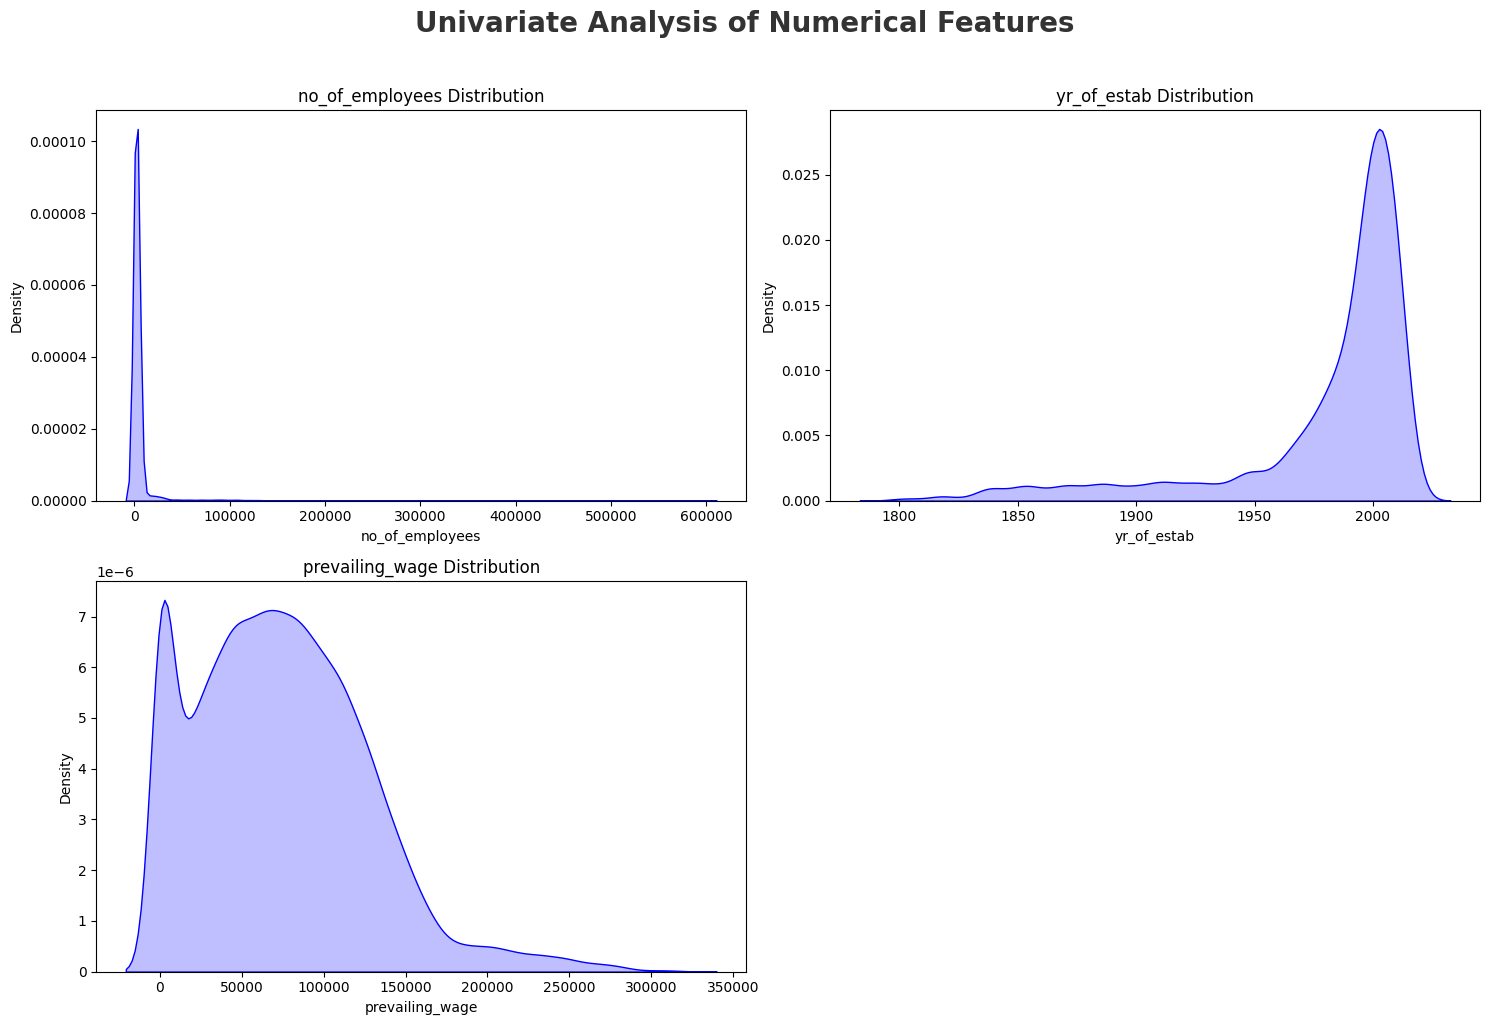

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

# # Create folder for images if not exists
# os.makedirs('./images', exist_ok=True)

# Plot configuration
num_features = len(numeric_features)
cols = 2  # number of columns in subplot grid
rows = math.ceil(num_features / cols)

plt.figure(figsize=(15, rows*5))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i, feature in enumerate(numeric_features):
    plt.subplot(rows, cols, i+1)
    sns.kdeplot(x=df[feature], color='blue', fill=True)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"{feature} Distribution", fontsize=12)
    
plt.tight_layout()

# Save the figure
# plt.savefig('./images/Univariate_Num.png')
# plt.show()


# Insights from Numerical Features

- The `no_of_employees` column appears to be highly skewed, which may be caused by outliers.
- The `yr_of_estab` (Year of Establishment) column is a **discrete feature**.
- The `prevailing_wage` column shows a **right-skewed distribution**, indicating that most wages are on the lower side with a few high values.


# Categorical Features

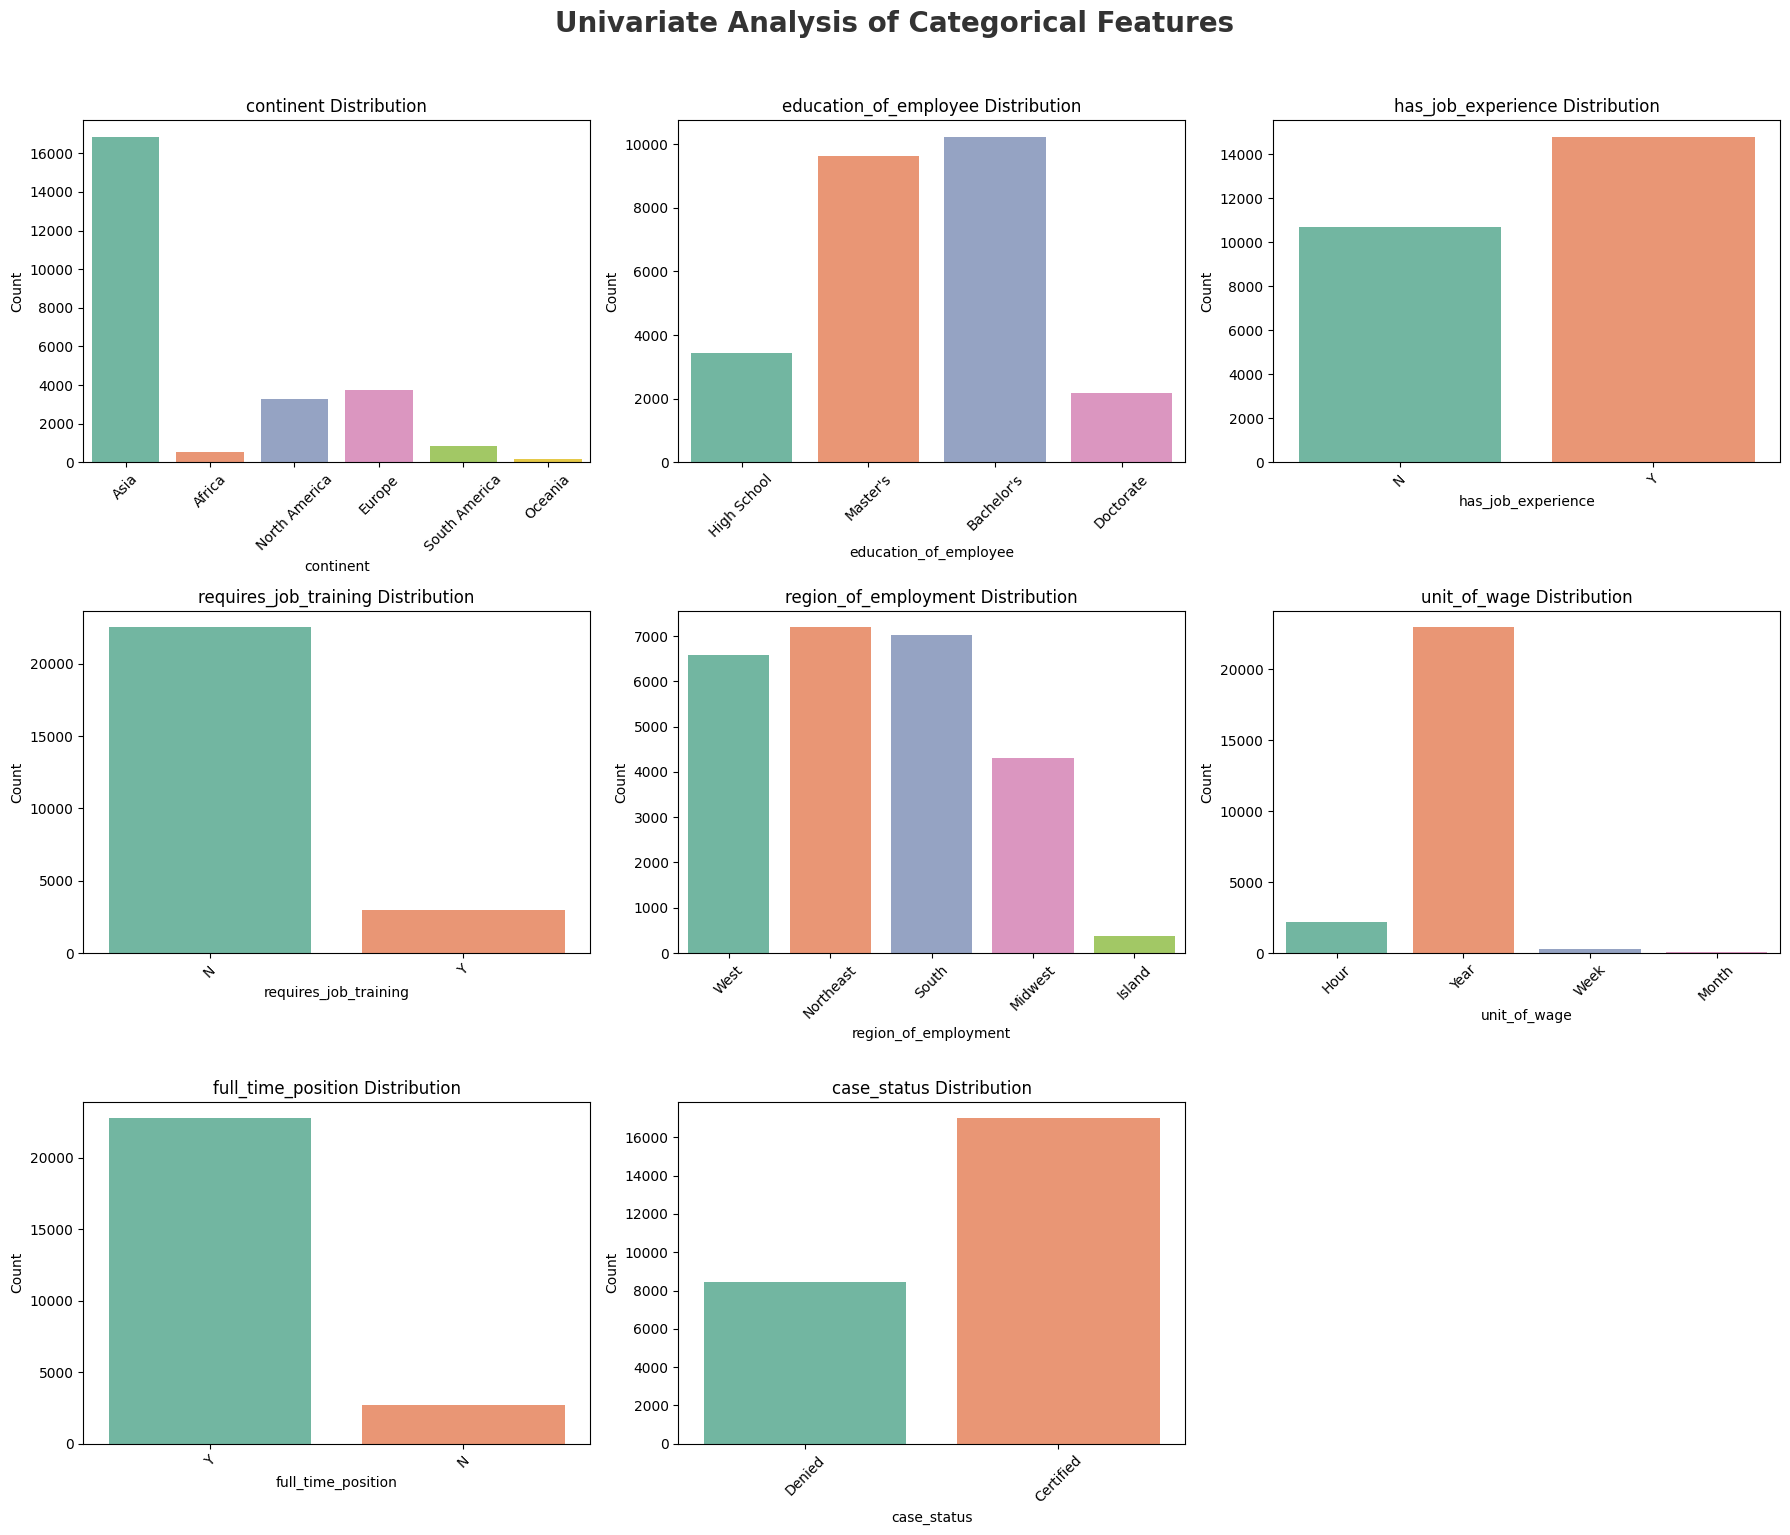

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

# Remove irrelevant column
categorical_features.remove("case_id")

# # Create folder for images if not exists
# os.makedirs('./images', exist_ok=True)

# Plot configuration
num_cat = len(categorical_features)
cols = 3  # number of columns in subplot grid
rows = math.ceil(num_cat / cols)

plt.figure(figsize=(18, rows*5))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i, feature in enumerate(categorical_features):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=df[feature], palette="Set2")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.title(f"{feature} Distribution", fontsize=12)

plt.tight_layout()

# Save the figure
# plt.savefig('./images/Univariate_Categorical.png')
# plt.show()


# Insights from Categorical Features

- The `requires_job_training`, `unit_of_wage`, `full_time_position`, and `continent` columns are dominated by a single category.  
- The remaining categorical columns appear to be relatively balanced across categories.



# Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [45]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]

continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]


print("We have {} discrete features : {}".format(len(discrete_features),discrete_features))
print("\nWe have {} continuous_features : {}".format(len(continuous_features),continuous_features))



We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


# Check Multicollineraity in Numerical features

In [46]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


# Insights on Multicollinearity

- There is **no multicollinearity** detected between any variables.

---

# Checking Multicollinearity for Categorical Features

- A **Chi-Squared test** (also written as chi-square or χ² test) is a statistical hypothesis test that is valid when the test statistic is chi-squared distributed under the null hypothesis.  
- Specifically, **Pearson's chi-squared test** is commonly used to check the relationship between two categorical variables.

- The chi-square statistic is a way to quantify the **relationship between two categorical variables**.

- In this project, we test the correlation of categorical features with the **target column**, i.e., `case_status`.

### Hypotheses

- **Null Hypothesis (H₀):** The feature is **independent** of the target column (no correlation).  
- **Alternative Hypothesis (H₁):** The feature is **not independent** of the target column (correlated).


In [47]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns = ['column','Hypothesis Result']
result

,column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


# Report

- The `requires_job_training` feature **fails to reject the Null Hypothesis**, which means it **does not correlate** with the target column.


# Checking Null Values


In [48]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [49]:
# Define numerical 
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Print the features
print(f"Numerical Features ({len(numeric_features)} features): {numeric_features}")


Numerical Features (3 features): ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


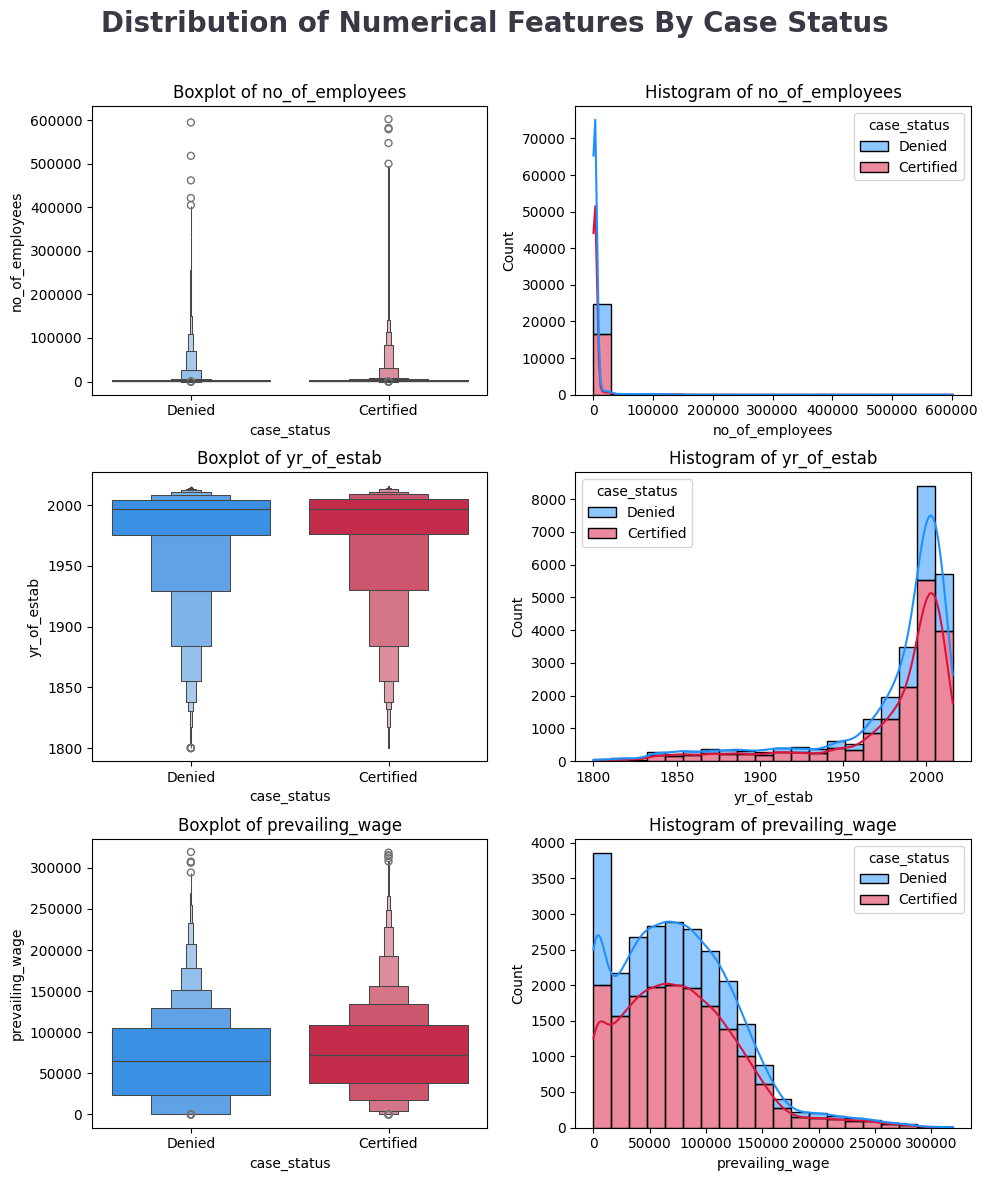

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

clr1 = ['#1E90FF', '#DC143C']

# Subplot grid (3 rows, 2 columns)
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

fig.suptitle(
    "Distribution of Numerical Features By Case Status", 
    color='#3C3744',
    fontsize=20,
    fontweight="bold",
    ha='center'
)

for i, col in enumerate(continuous_features):
    # Boxen plot
    sns.boxenplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)
    
    # Histogram
    sns.histplot(
        data=df,
        x=col,
        hue='case_status',  # corrected spelling
        bins=20,
        kde=True,
        multiple='stack',
        palette=clr1,  # corrected spelling
        ax=ax[i, 1]
    )
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

# plt.savefig('./images/multivariate_num.png')

# Initial Analysis Report  

- No of Employees has many outliers which can be handled in feature engineering, and `no_of_employees` is right skewed.  

- `yr_of_estab` is left skewed and has some outliers below the lower bound of the box plot.  

- `prevailing_wage` is right skewed with outliers above the upper bound of the box plot.  

- There are no missing values in the dataset.  

- The `case_id` column can be deleted because each row has unique values.  

- The `case_status` column is the target to predict.  

- In the categorical columns, features can be made binary numerical using feature encoding.  


# 4. Visualization
* 4.1 Visualize the Target Feature


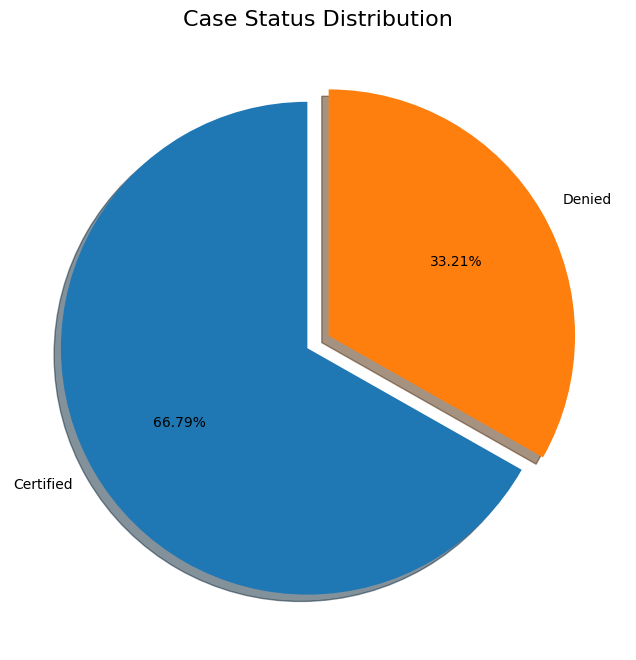

In [51]:
percentage = df["case_status"].value_counts(normalize=True) * 100
labels = percentage.index.tolist()

# Plot Pie Chart with Matplotlib
fig, ax = plt.subplots(figsize=(15, 8))

explode = [0.05] * len(labels)

ax.pie(
    percentage,
    labels=labels,
    startangle=90,
    autopct='%1.2f%%',
    explode=explode,
    shadow=True
)

ax.set_title("Case Status Distribution", fontsize=16)
plt.show()


- From the chart, it is seen that the target variable is **imbalanced**.  

### What is Imbalanced Data?  

Imbalanced data is a type of dataset where the target classes have an **uneven distribution of observations**.  
Here, the **Denied** class has a higher count than the **Certified** class in the dataset.  


* 4.2 Does data by continent has any impact on Visa status ?


In [52]:
# Does data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

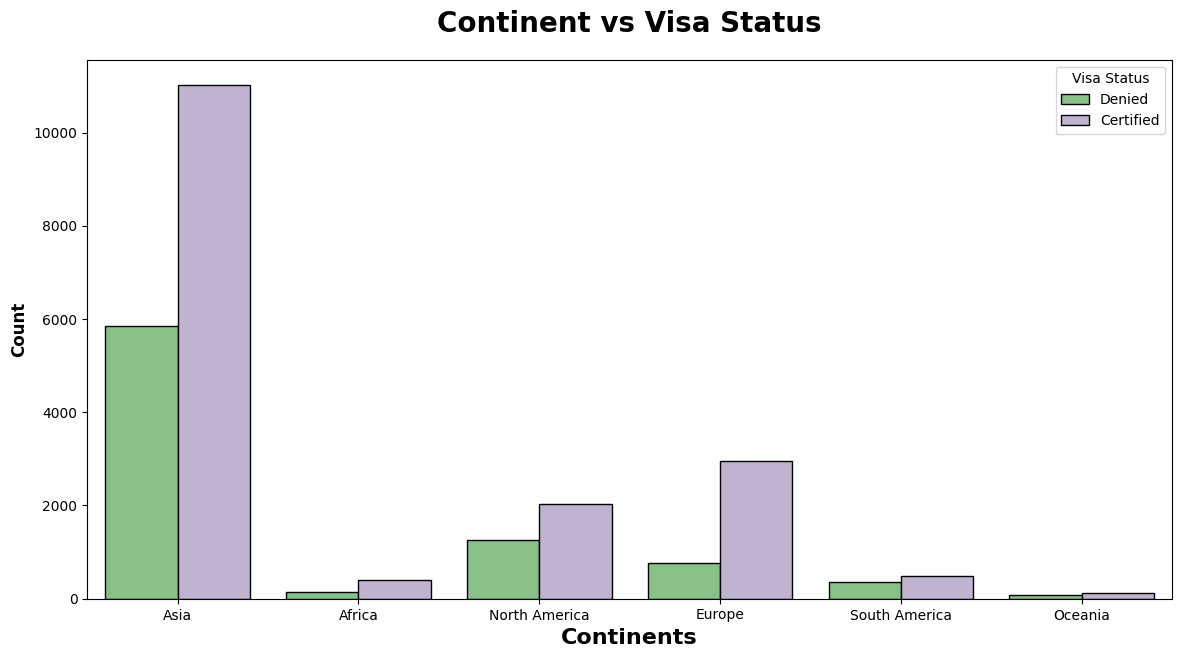

In [53]:
plt.figure(figsize=(14, 7))

sns.countplot(
    x="continent",
    hue="case_status",
    data=df,
    edgecolor="black",
    palette="Accent"
)

plt.title("Continent vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)

plt.show()



In [54]:
df2 = df.copy()

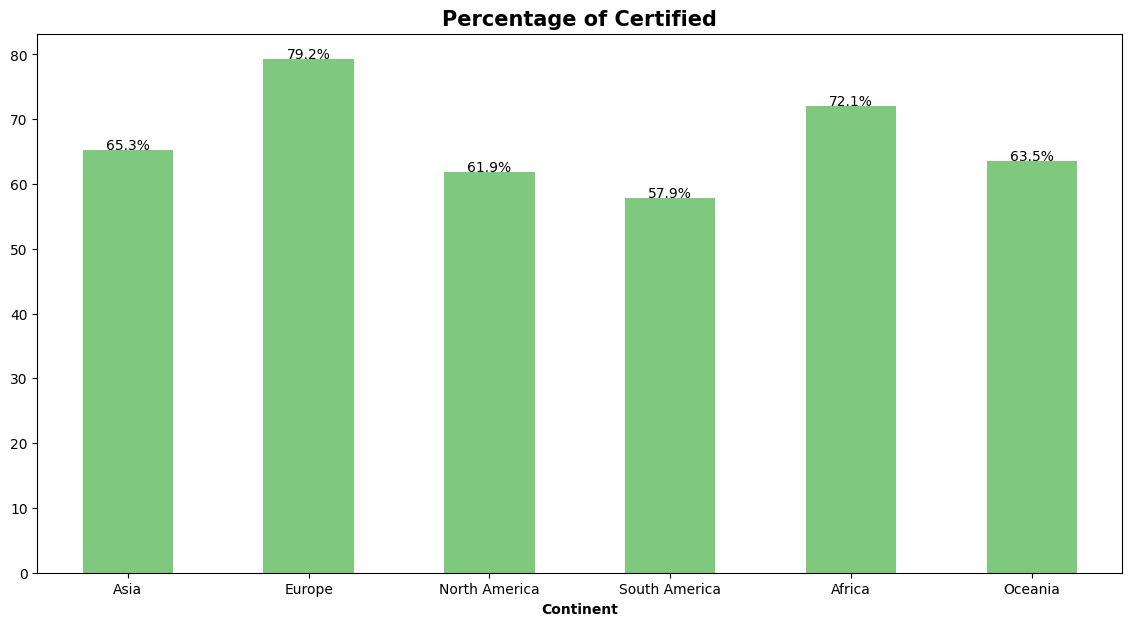

In [55]:
plt.figure(figsize=(14, 7))

(
    100 * df2[df2["case_status"].isin(["Certified"])]["continent"].value_counts()
    / df2["continent"].value_counts()
).plot(kind="bar", stacked=True, colormap="Accent")

plt.title("Percentage of Certified", fontsize=15, fontweight="bold")

order1 = (
    100 * df2[df2["case_status"].isin(["Certified"])]["continent"].value_counts()
    / df2["continent"].value_counts()
)

for n in range(order1.shape[0]):
    count = order1[n]
    strt = "{:0.1f}%".format(count)
    plt.text(n, count + 0.1, strt, ha="center")

plt.xlabel("Continent", fontweight="bold")
plt.xticks(rotation=0)
plt.show()


# Certification Report

- As per the chart, **Asia** has the highest number of applicants compared to other continents.  
- **43%** of certified applications come from **Asia**.  
- This is followed by **Europe**, which accounts for **11%** of certified applications.  
- The **highest chance of getting certified** is for applicants from **Europe**, followed by **Africa**.


** 4.3 Does applicant education has any impact on Visa status?

In [56]:
# group data by education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True)*100


education_of_employee  case_status
Bachelor's             Certified      62.214188
                       Denied         37.785812
Doctorate              Certified      87.226277
                       Denied         12.773723
High School            Denied         65.964912
                       Certified      34.035088
Master's               Certified      78.627777
                       Denied         21.372223
Name: proportion, dtype: float64

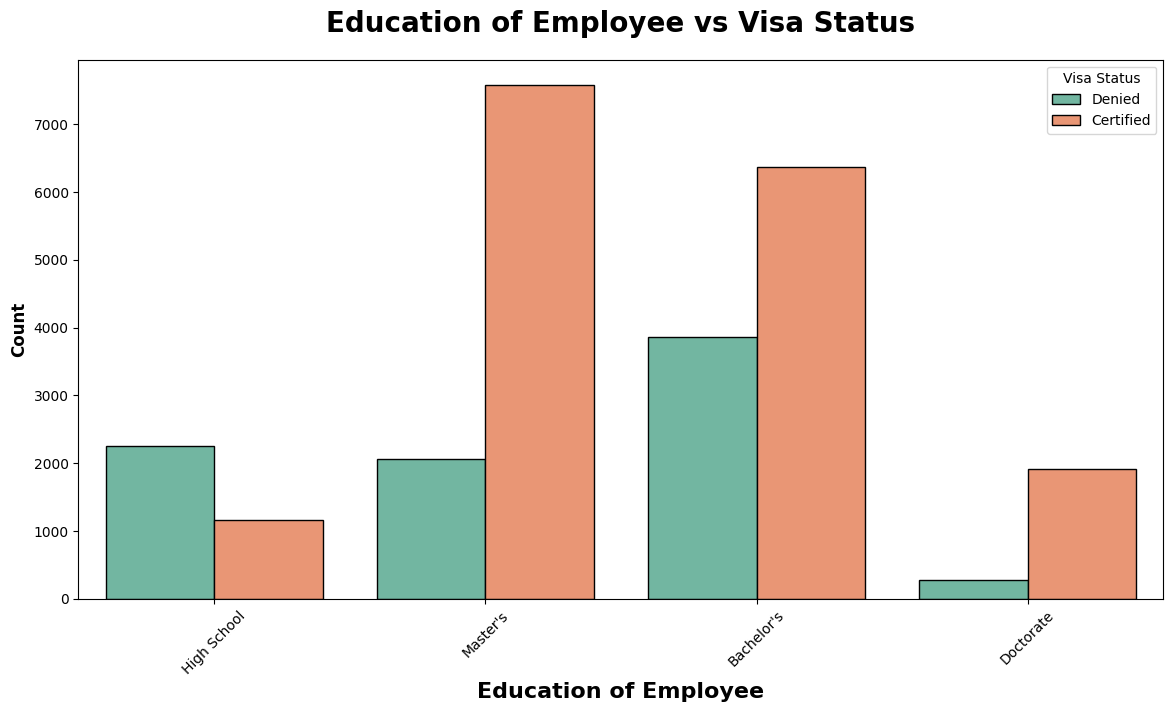

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))  # use figure instead of subplots if only one plot
sns.countplot(
    x="education_of_employee",  # make sure this column exists
    hue="case_status",
    data=df,
    edgecolor="black",
    palette="Set2"  # valid Seaborn palette
)

plt.title("Education of Employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.xticks(rotation=45)  # rotate x labels if too long
plt.legend(title="Visa Status", fancybox=True)
plt.show()


<Figure size 1400x700 with 0 Axes>

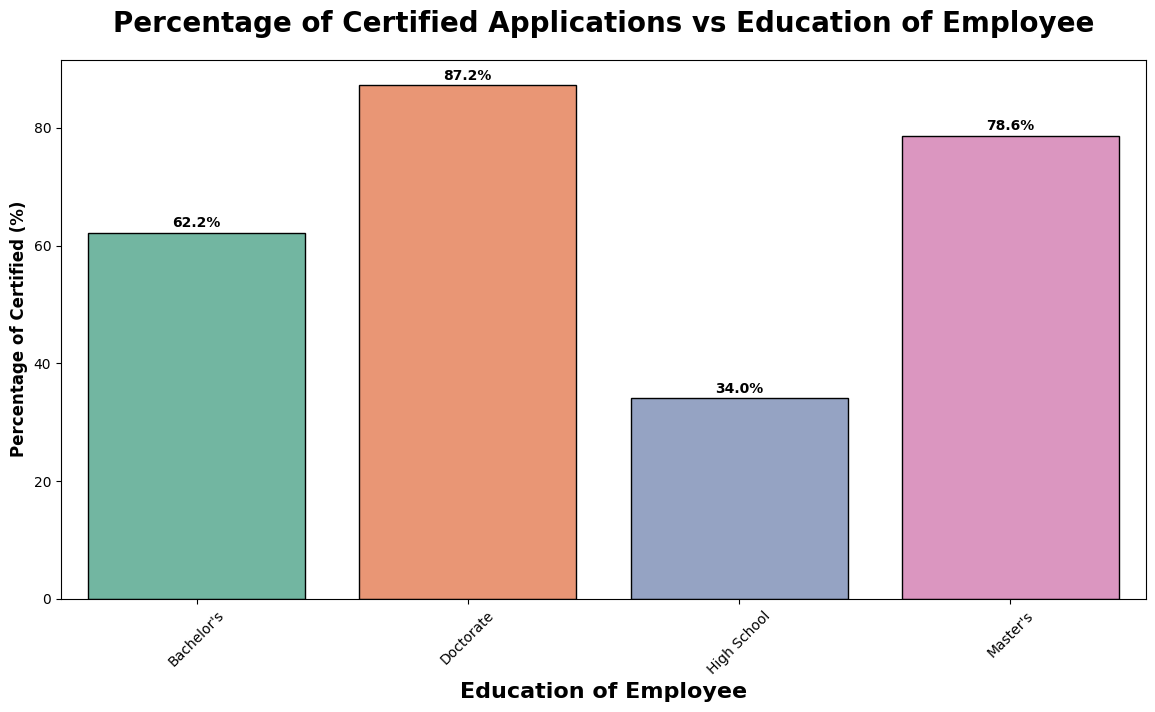

In [69]:
plt.figure(figsize=[14,7])

# প্রতিটি শিক্ষাগত স্তরের জন্য Certified % হিসাব করা
percent_certified = (
    df2[df2['case_status'] == 'Certified']
    .groupby('education_of_employee')['case_status']
    .count()  # Certified এর সংখ্যা
    / df2.groupby('education_of_employee')['case_status'].count()  # total per education
    * 100
)

# বার প্লট
plt.figure(figsize=[14,7])
sns.barplot(
    x=percent_certified.index,
    y=percent_certified.values,
    palette='Set2',
    edgecolor='black'
)

plt.title("Percentage of Certified Applications vs Education of Employee", weight='bold', fontsize=20, pad=20)
plt.xlabel("Education of Employee", weight='bold', fontsize=16)
plt.ylabel("Percentage of Certified (%)", weight='bold', fontsize=12)
plt.xticks(rotation=45)

# Percentage লেবেল বারগুলোর উপরে দেখানো
for i, val in enumerate(percent_certified.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', weight='bold')

plt.show()

# Visa Application Insights

- **Education level has a significant impact** on visa approval.  
- Applicants with **Doctorate** and **Master's degrees** have a **higher chance of being accepted** compared to applicants with other education levels.  
- Lower education levels are associated with **reduced approval rates**, indicating that **higher education increases the likelihood of certification**.


### 4.4 Does application's previous work experience has any impact on Visa sttus ?

In [70]:
# group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

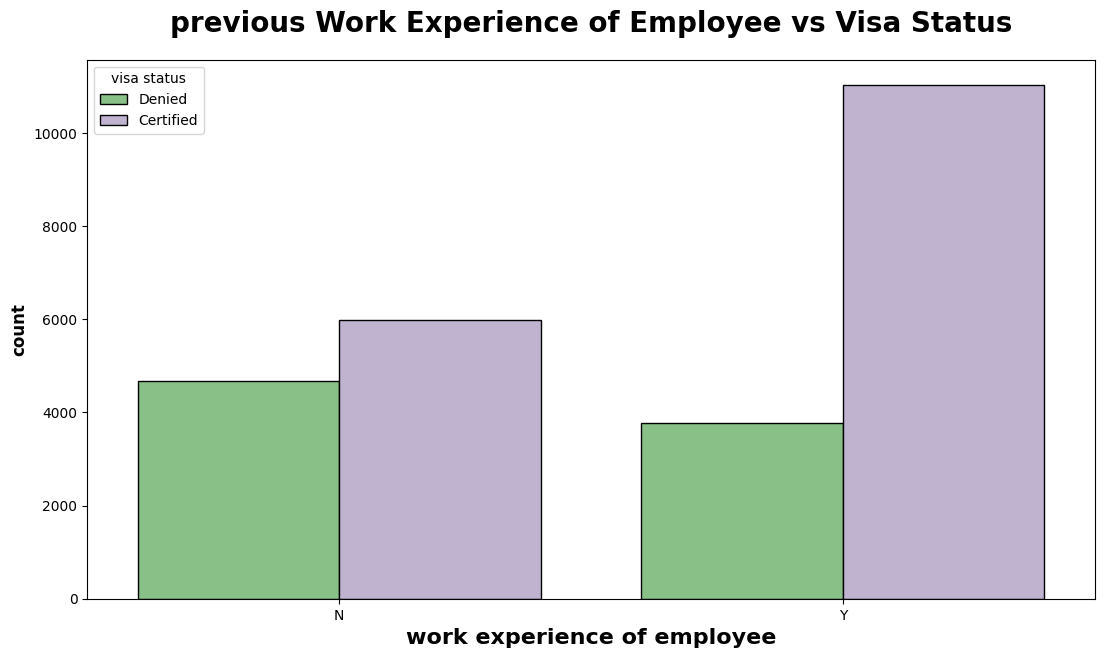

In [71]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df,ec="black",palette="Accent")
plt.title("previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20,pad=20)
plt.ylabel("count",weight="bold",fontsize=12)
plt.xlabel("work experience of employee", weight="bold",fontsize=16)
plt.legend(title="visa status", fancybox=True)
plt.show()

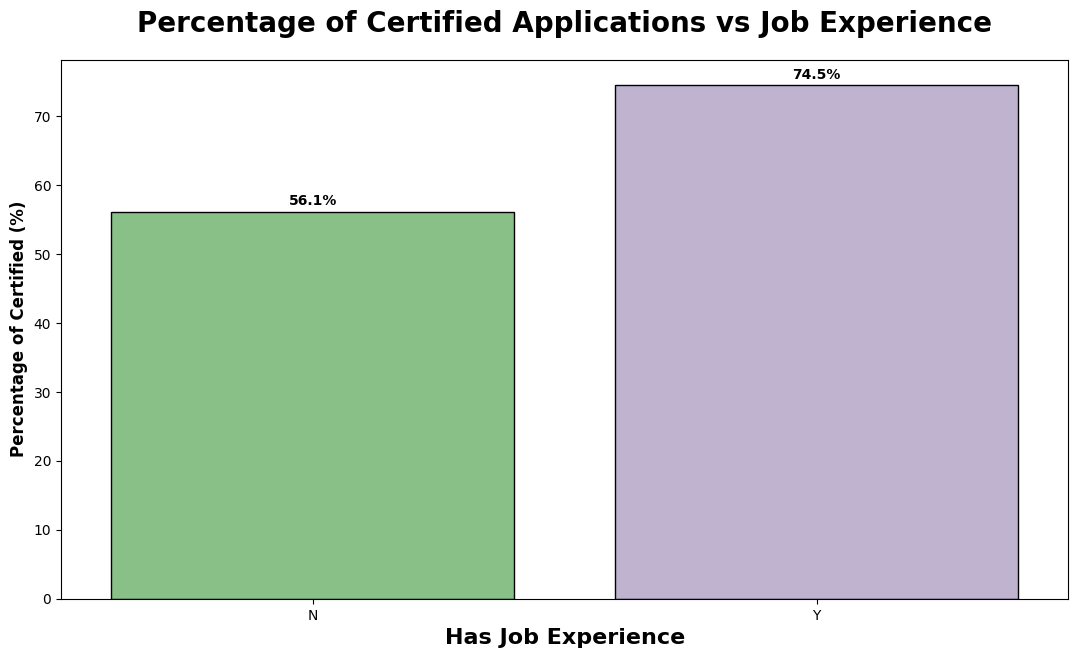

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# প্রতিটি 'has_job_experience' এর জন্য Certified % হিসাব করা
percent_certified_job = (
    df[df['case_status'] == 'Certified']
    .groupby('has_job_experience')['case_status']
    .count()  # Certified এর সংখ্যা
    / df.groupby('has_job_experience')['case_status'].count()  # total per job experience
    * 100
)

# বার প্লট
plt.figure(figsize=(13,7))
sns.barplot(
    x=percent_certified_job.index,
    y=percent_certified_job.values,
    palette='Accent',
    edgecolor='black'
)

plt.title("Percentage of Certified Applications vs Job Experience", weight="bold", fontsize=20, pad=20)
plt.xlabel("Has Job Experience", weight="bold", fontsize=16)
plt.ylabel("Percentage of Certified (%)", weight="bold", fontsize=12)

# Percentage লেবেল বারগুলোর উপরে দেখানো
for i, val in enumerate(percent_certified_job.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', weight='bold')

plt.show()


# Visa Application Report: Work Experience Impact

- Applicants with **previous work experience** have been **certified 74.5%**, while only **25.5% were denied**.  
- Applicants with **no previous work experience** have been **certified 56%** and **denied 43%**.  
- This indicates that **work experience has an effect on visa status**.  
- There is a **slight edge for applicants with work experience** compared to freshers, as expected, but the **difference is not very large**.


### 4.5 if the Employee requires job training, does it make any impact on visa status ? 


In [76]:
# group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

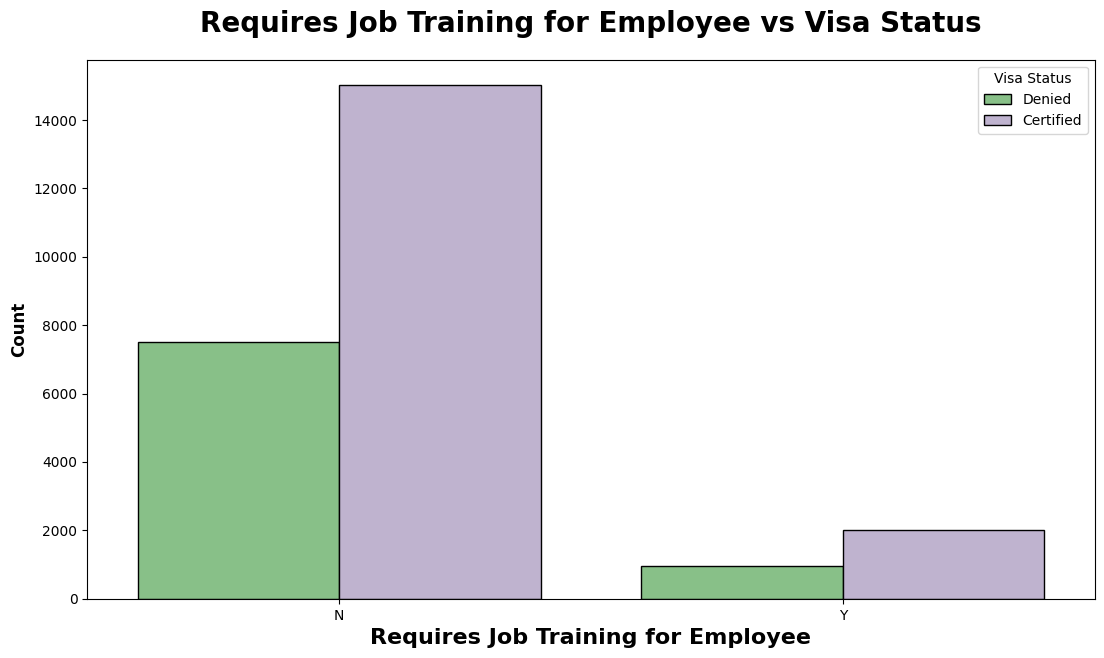

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,7))
sns.countplot(
    x="requires_job_training",
    hue="case_status",
    data=df,
    edgecolor="black",
    palette="Accent"
)

plt.title("Requires Job Training for Employee vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()


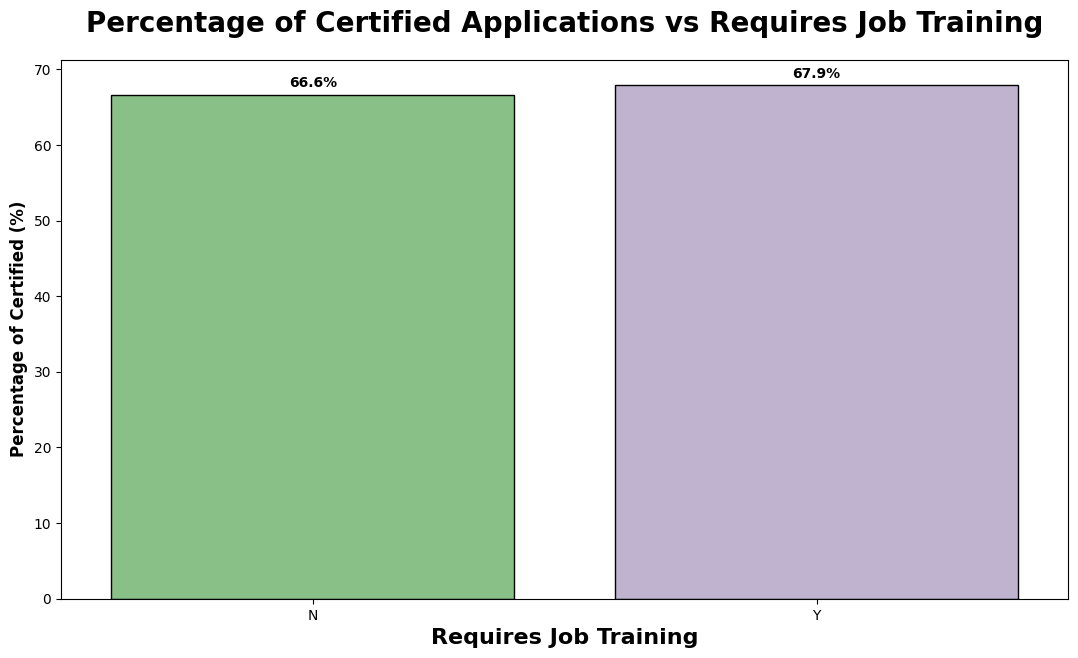

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# প্রতিটি requires_job_training ক্যাটেগরির জন্য Certified % হিসাব করা
percent_certified_training = (
    df[df['case_status'] == 'Certified']
    .groupby('requires_job_training')['case_status']
    .count()  # Certified এর সংখ্যা
    / df.groupby('requires_job_training')['case_status'].count()  # total per training requirement
    * 100
)

# বার প্লট
plt.figure(figsize=(13,7))
sns.barplot(
    x=percent_certified_training.index,
    y=percent_certified_training.values,
    palette='Accent',
    edgecolor='black'
)

plt.title("Percentage of Certified Applications vs Requires Job Training", weight="bold", fontsize=20, pad=20)
plt.xlabel("Requires Job Training", weight="bold", fontsize=16)
plt.ylabel("Percentage of Certified (%)", weight="bold", fontsize=12)

# Percentage লেবেল বারগুলোর উপরে দেখানো
for i, val in enumerate(percent_certified_training.values):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', weight='bold')

plt.show()


### Job Training and Visa Status

- If an employee requires job training, it does **not** have any effect on Visa status.
- **88%** of applicants do **not** require job training.
- **63%** of people who **do not** want job training got certified.
- For employees who **require** job training, **67%** got certified.
- As confirmed by the Chi-Squared test, this feature doesn't have much impact on the target variable, which is supported by the above plot.

### 4.6 Impact of Number of Employees of Employer on Visa Status

(To be analyzed)


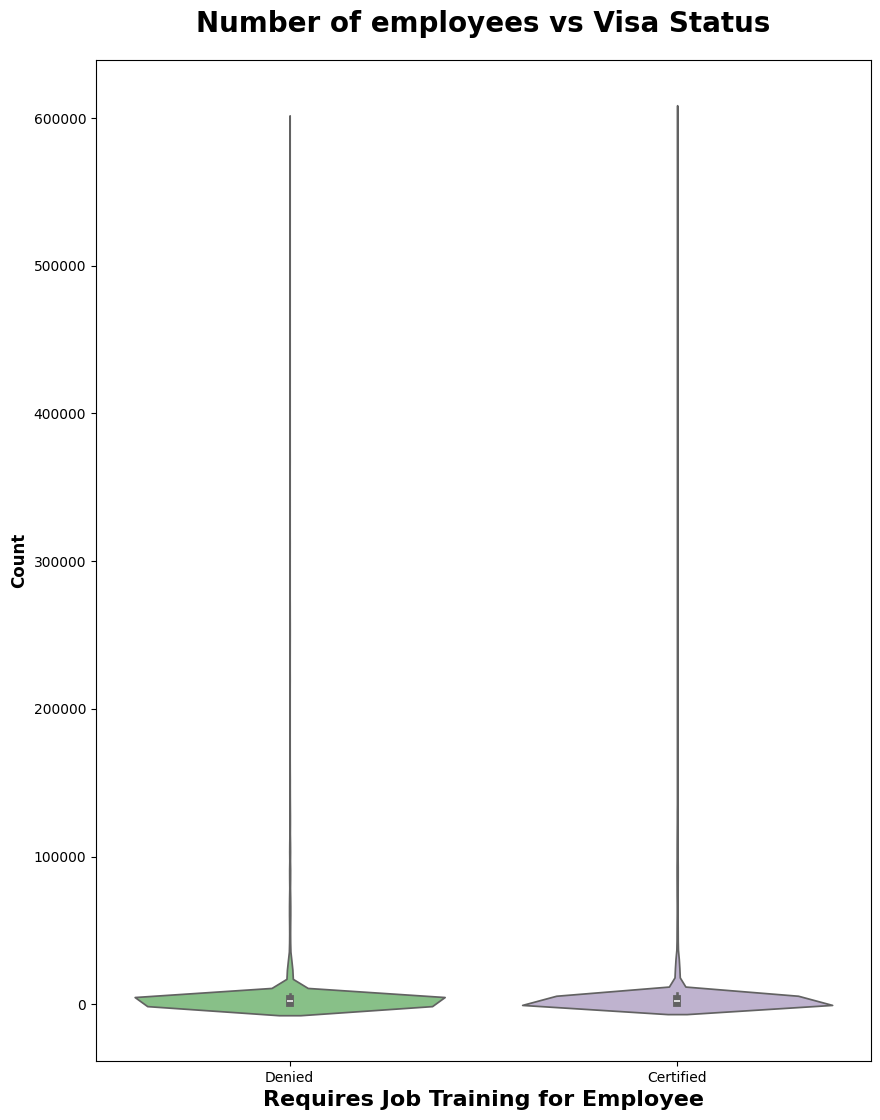

In [79]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

Insights

The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.

4.7 Wages and its impact on Visa status

In [80]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

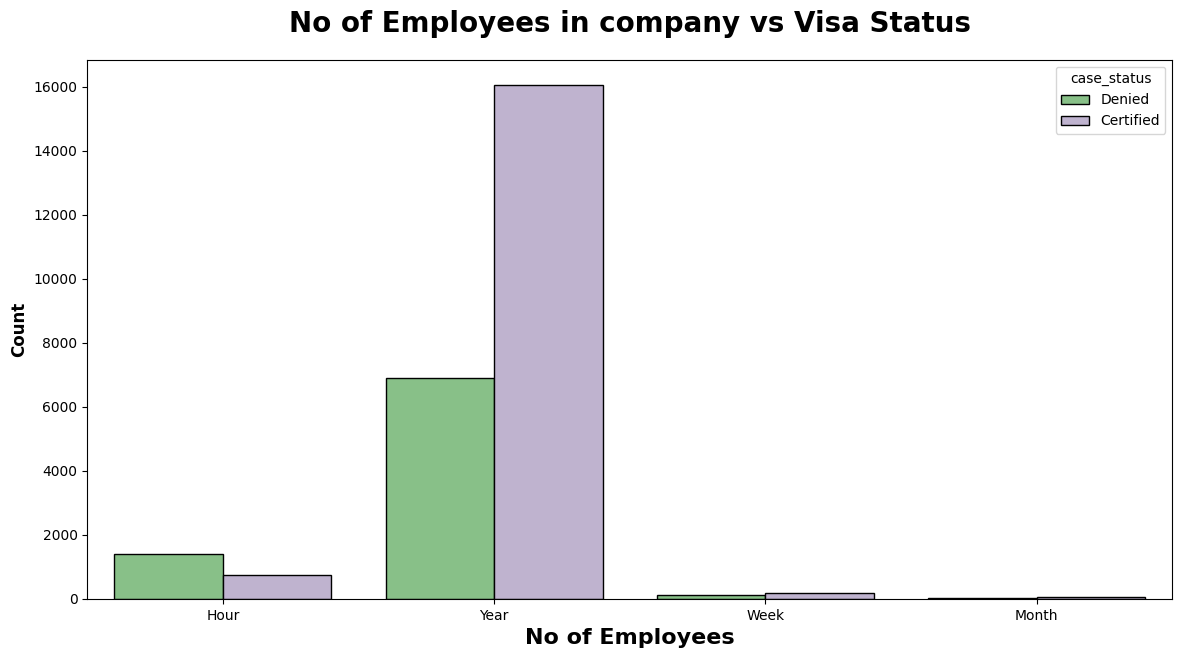

In [81]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

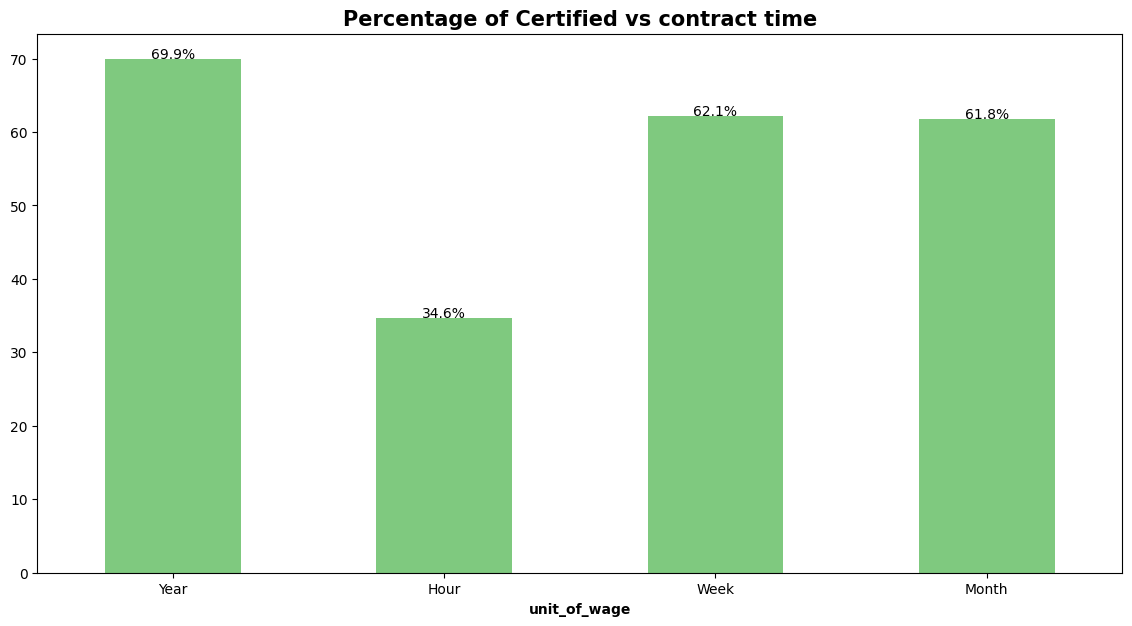

In [82]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

### Impact of Wage Type on Visa Status

- For employees who applied for **hourly pay**, **65%** of them were **denied**.
- Applications with **yearly unit wage** were **accepted 69%** of the time and **denied 31%** of the time.
- There is a **higher chance of acceptance** for yearly contracts compared to other wage types, immediately followed by weekly and monthly contracts.


4.7 Does Region of employment has impact on Visa status ?

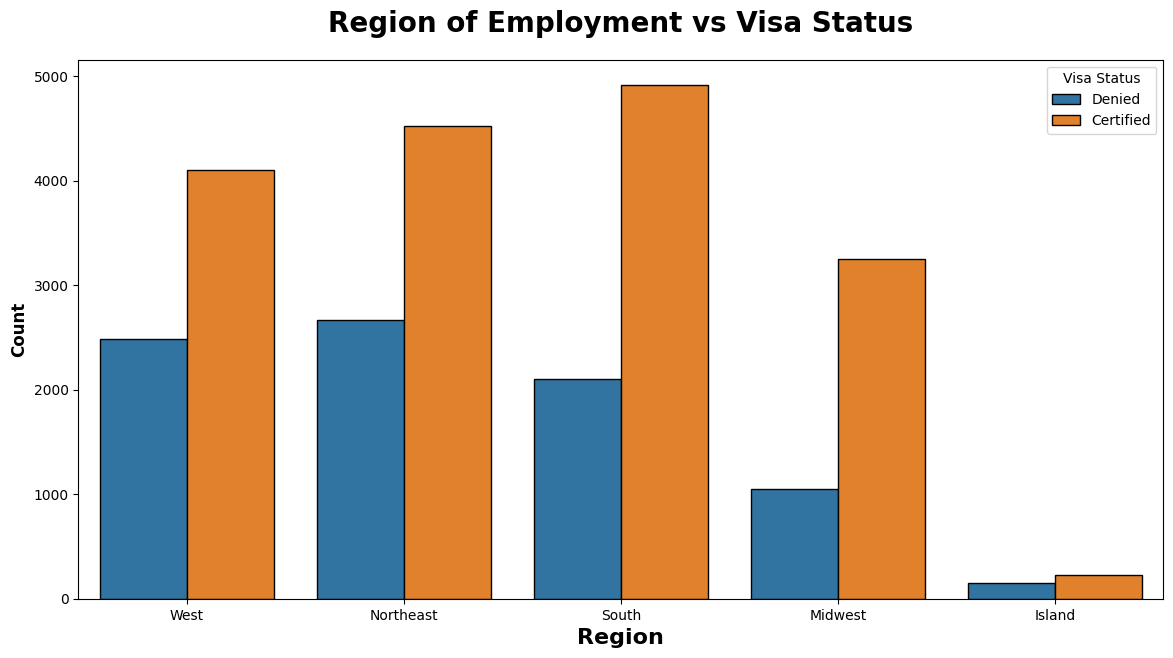

In [83]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

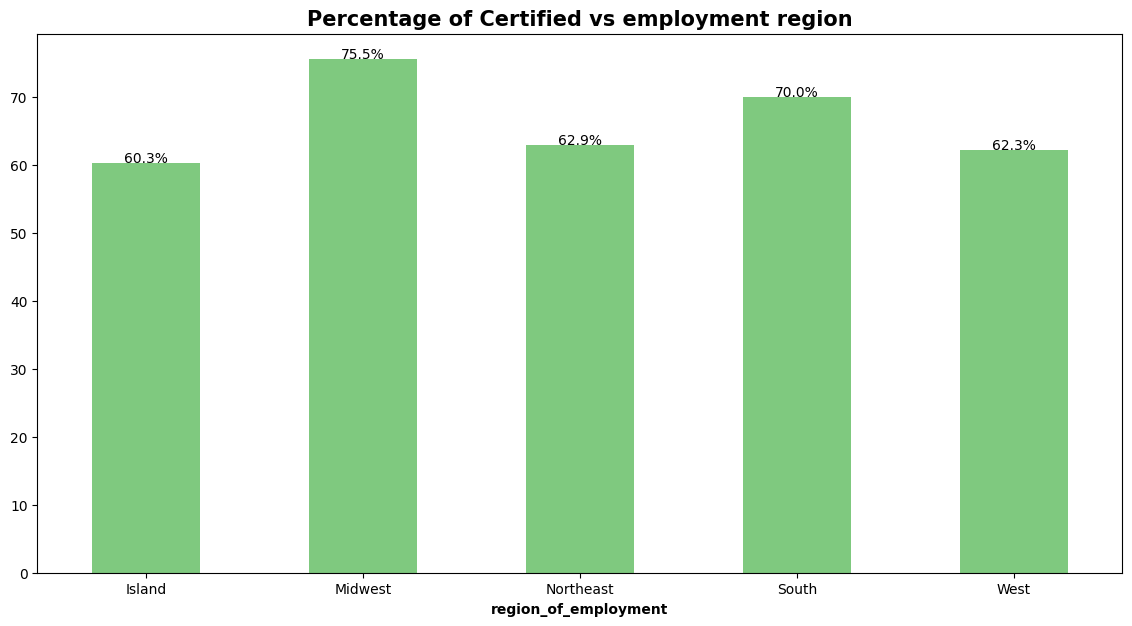

In [84]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

Report

As per chart all the region have very similar pattern of getting Visa certified and Denied.
There is a slight edge for midwest followed by South region

4.8 Does Prevailing wage has any impact on Visa status ?

In [85]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

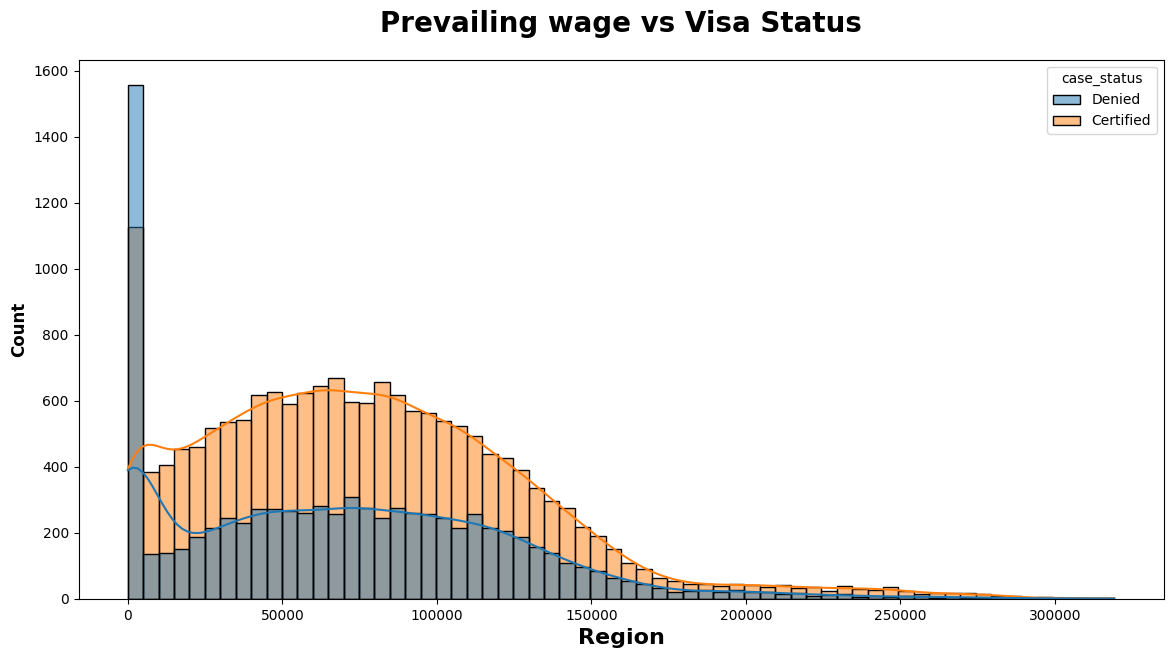

In [86]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

Insights

The distribution of both the classes are same but need to handel the outliers.

4.8.1 Prevailing wage based on Education

In [87]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


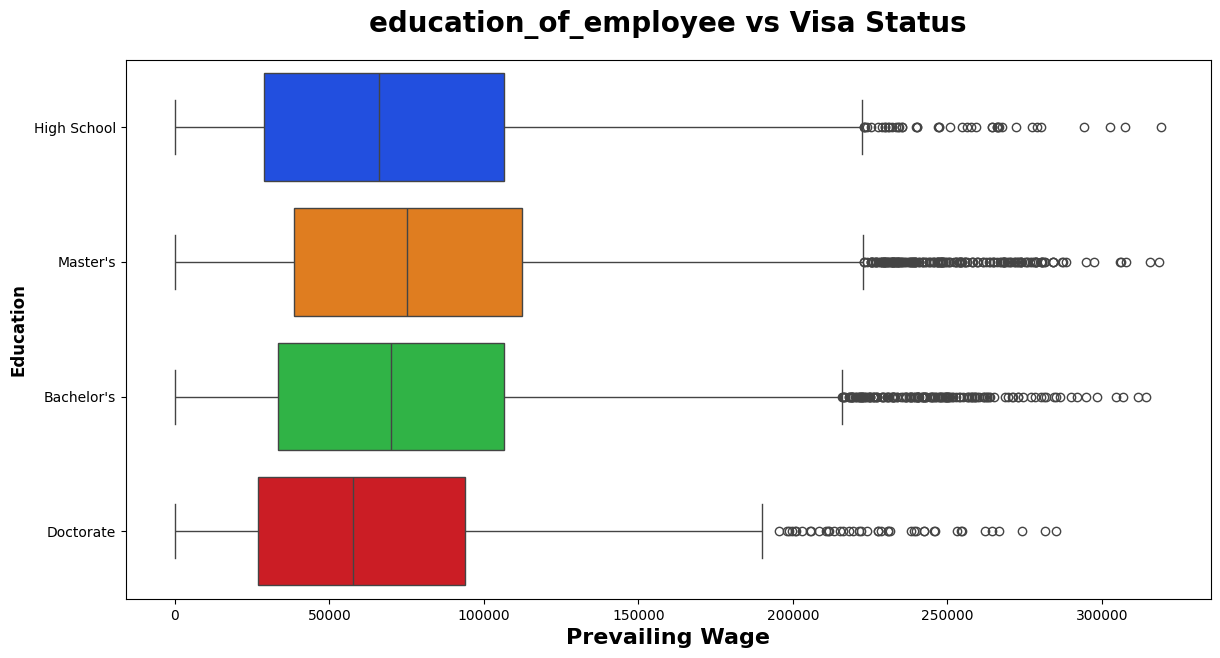

In [88]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("education_of_employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

### Report

* Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.
 * Master's education applicants have median salary of $78.8k, which approximately 20% higher than Doctrate's average wage, which is strange.

4.8.2 Prevailing wage based on Job experience

In [89]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


### Report

* Suprisingly people who has less job experience has more prevailing wage.
* No job experience applicant has median prevailing wage as 72k USD.
* Previous job experience applicant has median prevailing wage as 69K USD

4.8.3 Prevailing wage based on Continent

In [90]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


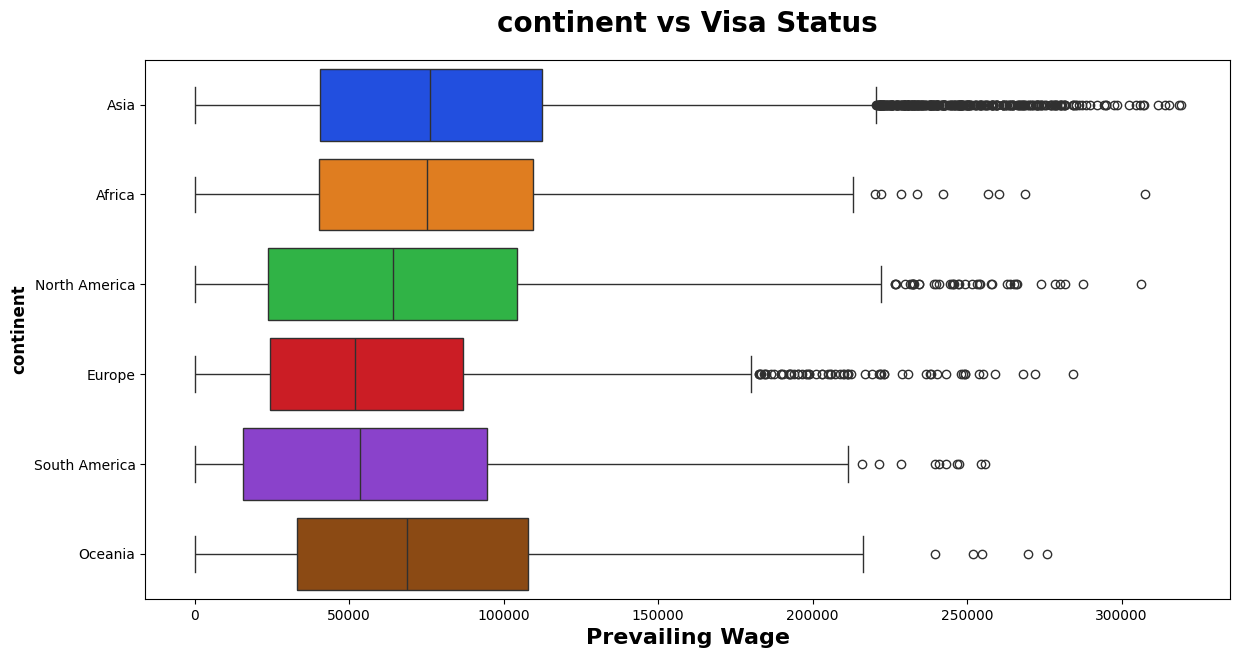

In [91]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("continent", weight="bold", fontsize=12)
plt.show()

Report

Average salary of people from Asia is higher than other continents

4.9 Year of Establishment

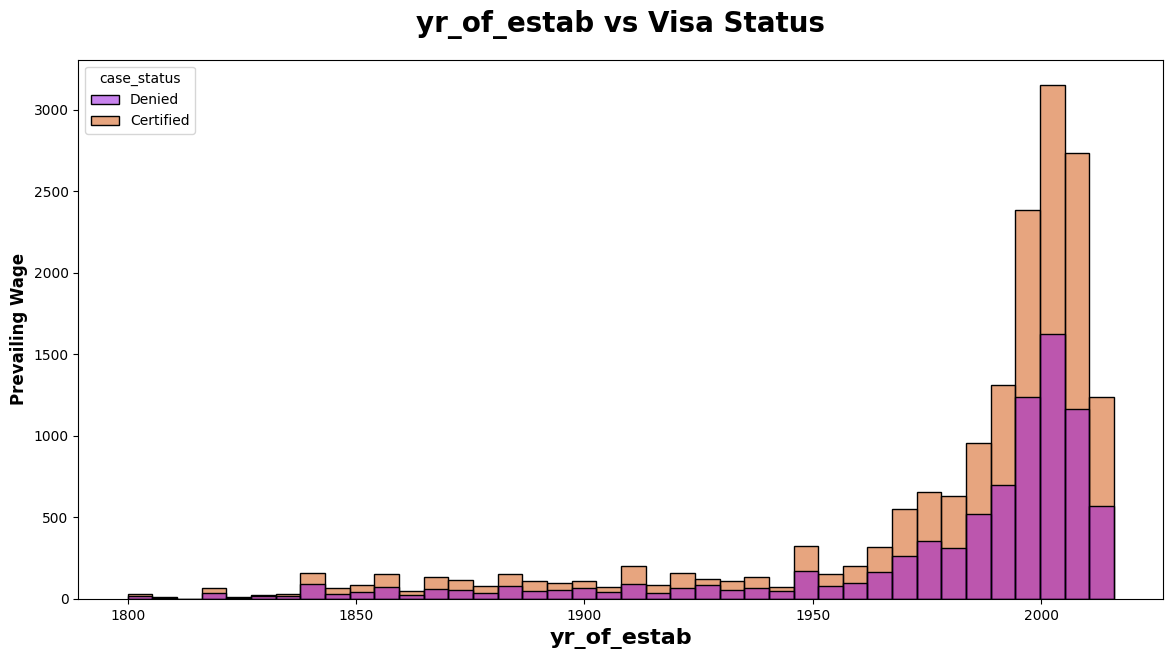

In [ ]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

### Company Establishment Analysis

- Each bin consists of **5 years**.
- Many companies were established **after the year 2000**.
- The **most company establishments** happened in the period **2000-2005**.

### Data Cleaning and Feature Selection Recommendations

- The **`case_id`** column can be **dropped** as it is just an ID.
- The **`requires_job_training`** column can be **dropped** as it doesn't have much impact on the target variable, confirmed by visualization and Chi-Squared test.
- **`no_of_employees`** and **`prevailing_wage`** columns contain **outliers** which should be handled.
- **`continent`** column has few unique values with very low counts; these can be grouped into **'Others'**.
- The target column **`case_status`** is **imbalanced**, which should be addressed before model building.
